In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
np.random.seed(42)


# Direct Methods for the solution of Linear Systems

In [2]:
n1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # random matrix

n2 = [5, 10, 15, 20, 25, 30] # Vandermonde matrix

n3 = [4, 5, 6, 7, 8, 9, 10, 11, 12] # Hilbert matrix

E_rel_r = [] # relative error
k2_r = [] # 2-norm
kinf_r = [] # inf-norm

E_rel_v = [] 
k2_v = [] 
kinf_v = [] 

E_rel_h = [] 
k2_h = [] 
kinf_h = [] 

print('RANDOM')
for i in n1:
    A = np.random.rand(i,i)
    xt = np.ones(i)
    b = A @ xt

    cond2 = np.linalg.cond(A) 
    k2_r.append(cond2)
    condinf = np.linalg.cond(A, p=np.inf)
    kinf_r.append(condinf)

    x = np.linalg.solve(A,b)
    rel = np.linalg.norm(xt- x, 2) / np.linalg.norm(xt, 2)
    E_rel_r.append(rel)

print('VANDERMONDE')
for i in n2:
    V = np.vander(range(1,i+1))
    xt = np.arange(1,i+1)
    b = V@xt

    cond2 = np.linalg.cond(V)
    k2_v.append(cond2)

    condinf = np.linalg.cond(V, p=np.inf)
    kinf_v.append(condinf)

    x = np.linalg.solve(V,b)
    rel = np.linalg.norm(xt- x, 2) / np.linalg.norm(xt, 2)
    E_rel_v.append(rel)

print('HILBERT')
for i in n3:
    H = scipy.linalg.hilbert(i)
    xt = np.ones(i)
    b = H@xt

    cond2 = np.linalg.cond(H, p=2)
    k2_h.append(cond2)

    condinf = np.linalg.cond(H, p=np.inf)
    kinf_h.append(condinf)

    x = np.linalg.solve(H,b)
    rel = np.linalg.norm(xt- x, 2) / np.linalg.norm(xt, 2)
    E_rel_h.append(rel)

RANDOM
VANDERMONDE
HILBERT


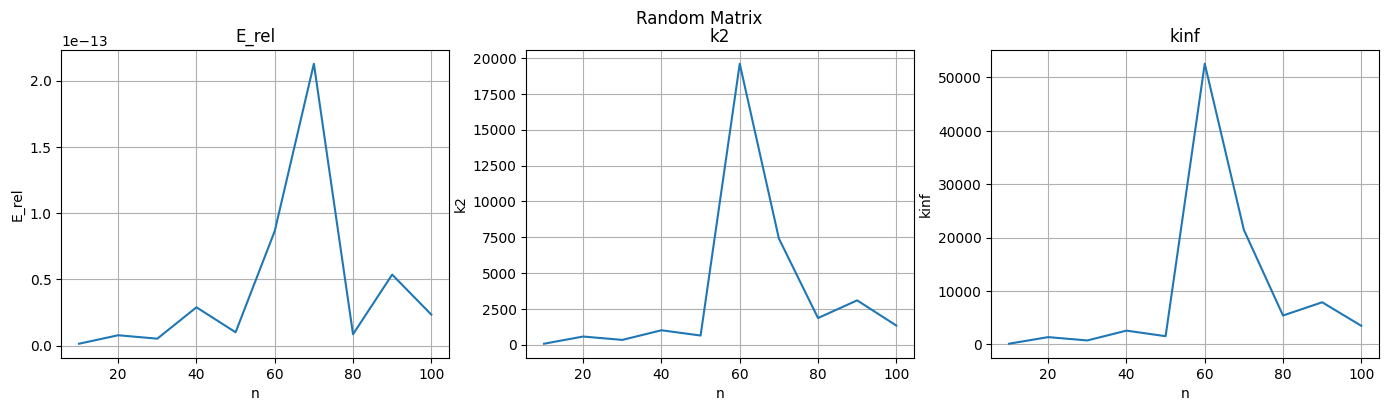

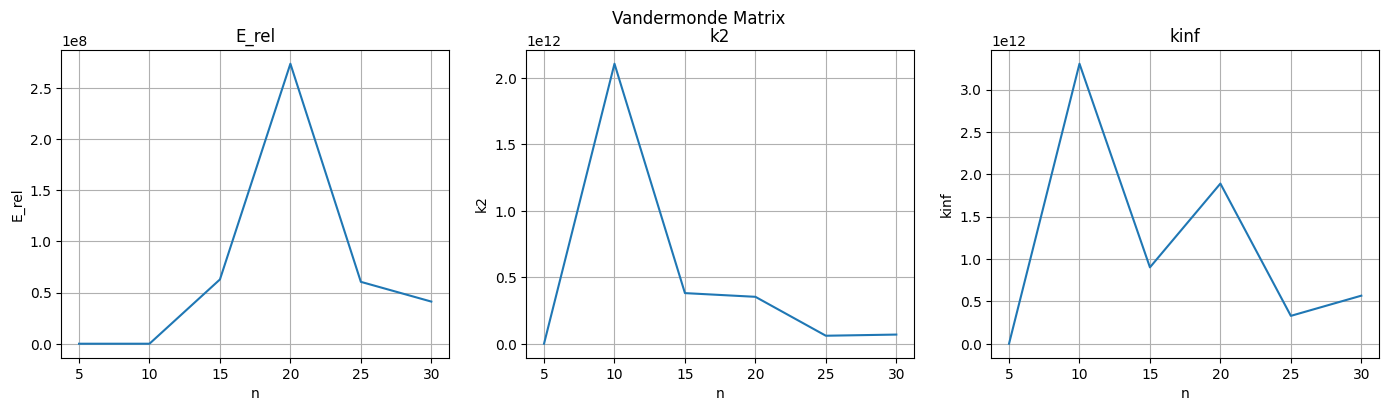

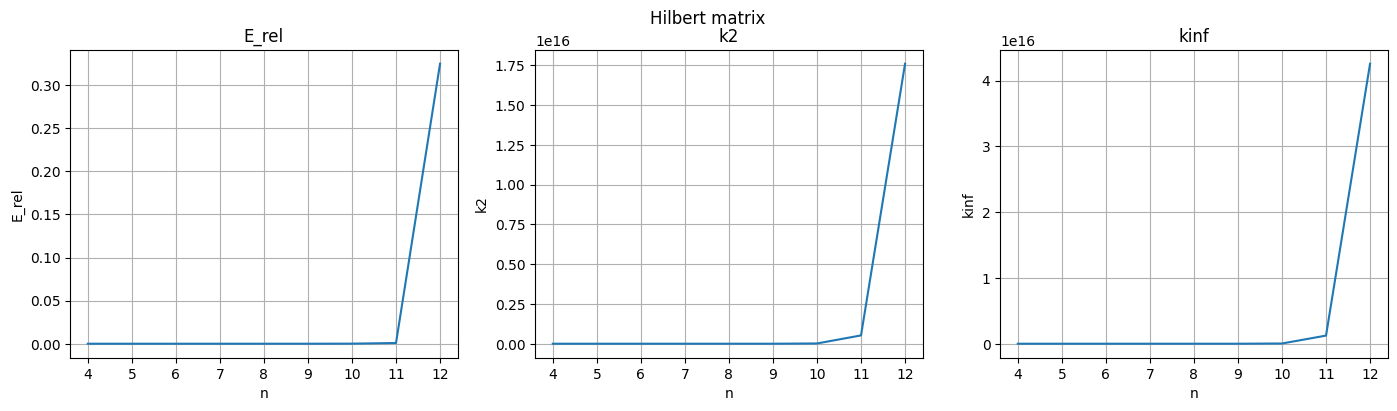

In [4]:
def plot_subplot(n_values, E_rel, k2, kinf, title):
    fig = plt.figure(figsize=(17, 4))
    fig.suptitle(title)
    for i, (data, label) in enumerate(zip([E_rel, k2, kinf], ['E_rel', 'k2', 'kinf'])):
        plt.subplot(1, 3, i+1)
        plt.plot(n_values, data)
        plt.title(f'{label}')
        plt.xlabel("n")
        plt.ylabel(label)
        plt.grid()


plot_subplot(n1, E_rel_r, k2_r, kinf_r, 'Random Matrix')
plt.show()

plot_subplot(n2, E_rel_v, k2_v, kinf_v, 'Vandermonde Matrix')
plt.show()

plot_subplot(n3, E_rel_h, k2_h, kinf_h, 'Hilbert matrix')
plt.show()

After the testing we can see that for little value for the n parameter the Hilbert and the Vandermonde matrix are heavily ill-conditioned compared to the random matrix, which is a little bit ill-conditioned just for big value for n.

Regarding Random matrices the results suggest that the stability of numerical computations with random matrices can vary significantly depending on the matrix size. Specifically, matrices with dimensions around n = 60.

Also Vandermonde matrices has a peak in the middle of the graph and then decrease, mantaining big value for condition number anyway.

The Hilbert matrix is the most ill-conditioned of all.

# Floating Point Arithmetic

In [11]:
eps = 1.0

while 1.0 + eps > 1.0:
    eps /= 2.0
    
eps *= 2.0  # Adjusting for the last successful iteration

print("Machine epsilon (computed):", eps)


Machine epsilon (computed): 2.220446049250313e-16


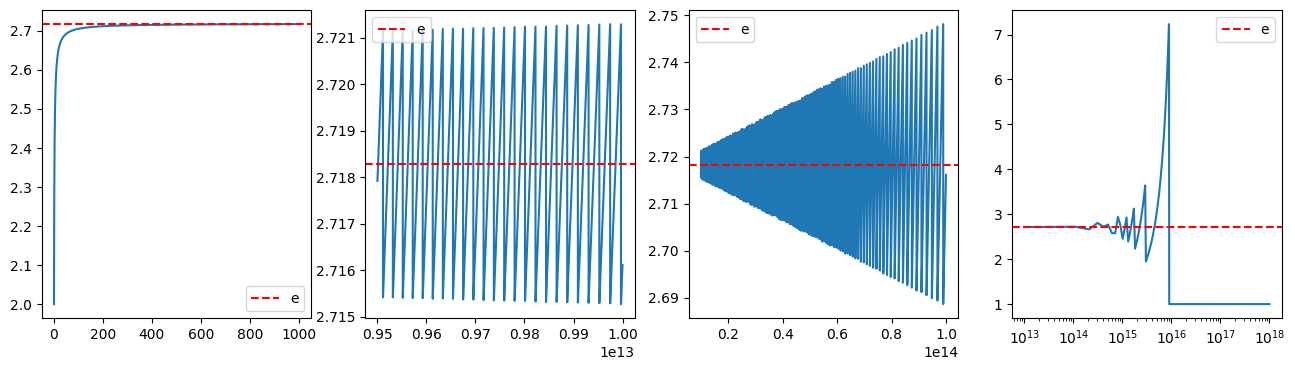

In [18]:
# Euler costant = 2.718281828459

def get_a_n(n):
    return (1+1/n)**n

plt.figure(figsize=(16,4))

plt.subplot(1, 4, 1)
x = [n for n in np.linspace(1,1e3,10000)]
plt.plot(x, [get_a_n(n) for n in x])
plt.axhline(y=np.exp(1), color='r', linestyle='--', label='e')
plt.legend()

plt.subplot(1, 4, 2)
x = [n for n in np.linspace(9.5e12,1e13,10000)]
plt.plot(x, [get_a_n(n) for n in x])
plt.axhline(y=np.exp(1), color='r', linestyle='--', label='e')
plt.legend()

plt.subplot(1, 4, 3)
x = [n for n in np.linspace(1e13,1e14,10000)]
plt.plot(x, [get_a_n(n) for n in x])
plt.axhline(y=np.exp(1), color='r', linestyle='--', label='e')
plt.legend()

plt.subplot(1, 4, 4)
x = [n for n in np.linspace(1e13,1e18,10000)]
plt.plot(x, [get_a_n(n) for n in x])
plt.xscale("log")
plt.axhline(y=np.exp(1), color='r', linestyle='--', label='e')
plt.legend()

plt.show()


For small values the series converges to the euler number

For values over 1e16 it flatlines to 1, meaning that 1+1/n = 1, and that makes sense because 1/n will be SMALLER than machine epsilon

For intermediate values of n: When n is in an intermediate range, the series seems to lose its convergence. This is due to the finite  representation of numbers in floating-point arithmetic on a computer-> (1+1/n) is not the real number but just an approximation. Even though the value of (1+1/n) may appear close to 1, the discrepancies due to approximation are amplified when raised to the power of n, resulting in spikes observed in the graph, so there is an exponential behaviour. When the spike ends, 1+1/n goes to the next smallest number and another spike forms (exponentially negative), this create the oscillation pattern 

Matrices

In [3]:
A = [[4,2],[1,3]]
A = np.array(A)

B = [[4,2],[2,1]]
B = np.array(B)

#compute the rank of the two matrices
print("The rank of A is {}".format(np.linalg.matrix_rank(A)))
print("The rank of B is {}".format(np.linalg.matrix_rank(B)))

The rank of A is 2
The rank of B is 1


A is a full-rank matrix because rank = min(m,n) where m and n are respectively rows and columns of the matrix.
B instead is not full rank.

In [4]:
print("The eigenvalues of A are {}".format(np.linalg.eigvals(A)))
print("The eigenvalues of B are {}".format(np.linalg.eigvals(B)))

The eigenvalues of A are [5. 2.]
The eigenvalues of B are [5. 0.]


B has an eigenvalues equal to 0. 

This means that its characteristical polynomial and corresponding equation det(B-l*I) = 0 has a solution in l = 0.

In fact it becomes:

(4-l)*(1-l)-4 = 0

4-5*l+l^2-4 = 0

l*(l-5) = 0

That gives as solution 5 and 0.
This means that Bx = 0*l for some eigenvector x!=0. So the eigenvector belong to the kernel of B. The resolution of the system Bx = 0 implies
the dependence of the columns of the B matrix.
The most immediate thing we can see to understand it is that the two columns of B are NOT linearly independent, in fact the first is 2 times the second. The rank is the maximum number of linearly independent columns, that in this case is just 1.

Examples

In [5]:
C = np.array([[4,2,6], 
     [1,3,8],
     [5,6,9]])

print("Rank of C: {}".format(np.linalg.matrix_rank(C)))
print("Eigenvalues of C: {}".format(np.linalg.eigvals(C)))

D = np.array([[2,2,6], 
     [4,4,12],
     [0,0,1]])

print("Rank of D: {}".format(np.linalg.matrix_rank(D)))
print("Eigenvalues of D: {}".format(np.linalg.eigvals(D)))

Rank of C: 3
Eigenvalues of C: [16.01590399  2.17042961 -2.1863336 ]
Rank of D: 2
Eigenvalues of D: [0. 6. 1.]


The matrix D has the same problem